In [17]:
import yfinance as yf
import talib
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os


### Load Dataset

In [5]:
df = pd.read_csv("../data/AAPL_historical_data.csv", parse_dates=['Date'])
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.098943,469033600,0.0,0.0
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.093781,175884800,0.0,0.0
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.086898,105728000,0.0,0.0
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089049,86441600,0.0,0.0
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091630,73449600,0.0,0.0


## Technical Indicators

### Moving Average

In [6]:
df['MA_20'] = talib.SMA(df['Close'], timeperiod=20)
df['MA_50'] = talib.SMA(df['Close'], timeperiod=50)

### RSI

In [7]:
df['RSI'] = talib.RSI(df['Close'], timeperiod=14)

### MACD

In [11]:
df['MACD'], df['MACD_signal'], df['MACD_hist'] = talib.MACD(
    df['Close'], fastperiod=12, slowperiod=26, signalperiod=9)

## Vizualize Indicators

### Plot MA

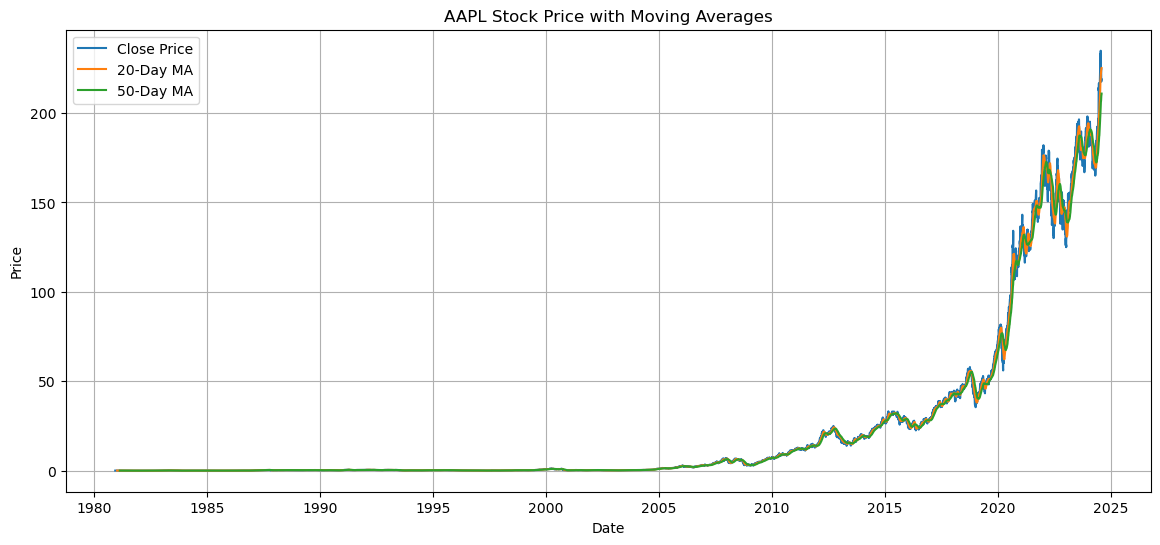

In [8]:
plt.figure(figsize=(14, 6))
plt.plot(df['Date'], df['Close'], label='Close Price')
plt.plot(df['Date'], df['MA_20'], label='20-Day MA')
plt.plot(df['Date'], df['MA_50'], label='50-Day MA')
plt.legend()
plt.title("AAPL Stock Price with Moving Averages")
plt.xlabel("Date")
plt.ylabel("Price")
plt.grid(True)
plt.show()

### Plot RSI

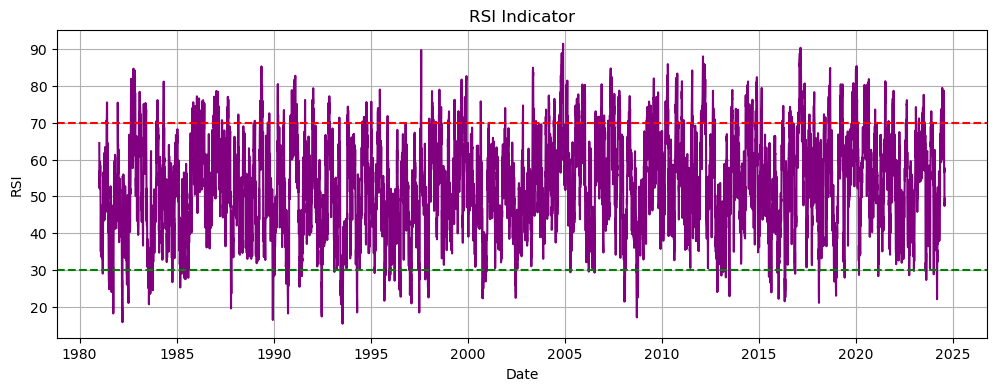

In [9]:
plt.figure(figsize=(12, 4))
plt.plot(df['Date'], df['RSI'], label='RSI', color='purple')
plt.axhline(70, linestyle='--', color='red')
plt.axhline(30, linestyle='--', color='green')
plt.title("RSI Indicator")
plt.xlabel("Date")
plt.ylabel("RSI")
plt.grid(True)
plt.show()


### Plot MACD

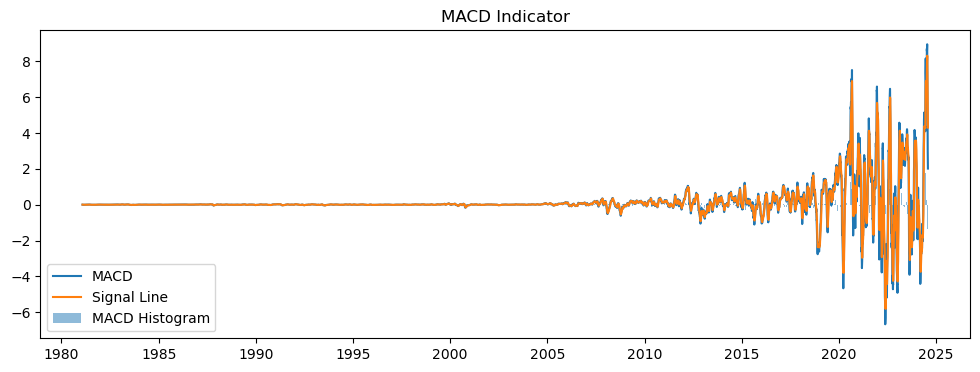

In [12]:
plt.figure(figsize=(12, 4))
plt.plot(df['Date'], df['MACD'], label='MACD')
plt.plot(df['Date'], df['MACD_signal'], label='Signal Line')
plt.bar(df['Date'], df['MACD_hist'], label='MACD Histogram', alpha=0.5)
plt.title("MACD Indicator")
plt.legend()
plt.show()

### Save Results

In [14]:
plt.savefig("../output/macd_plot.png")

<Figure size 640x480 with 0 Axes>

# Simulate Investment Strategy

### Load the Datasets

In [22]:
# Folder with your CSV files
data_folder = "../data"

# Tickers you want to analyze
tickers = ['AAPL', 'MSFT', 'GOOG', 'AMZN', 'META', 'NVDA', 'TSLA']

# Load data into a dictionary of DataFrames
price_data = {}
for ticker in tickers:
    file_path = os.path.join(data_folder, f"{ticker}_historical_data.csv")
    df = pd.read_csv(file_path, parse_dates=['Date'], index_col='Date')
    df.sort_index(inplace=True)
    price_data[ticker] = df

### Calculate Techinical Indicators

In [23]:
import talib

for ticker, df in price_data.items():
    df['RSI'] = talib.RSI(df['Close'], timeperiod=14)
    df['SMA_20'] = talib.SMA(df['Close'], timeperiod=20)
    df['MACD'], df['MACD_signal'], _ = talib.MACD(df['Close'])


### Simulate Portfolio

In [24]:
# Merge closing prices into one DataFrame
close_prices = pd.concat([df['Close'].rename(ticker) for ticker, df in price_data.items()], axis=1)

# Normalize prices for comparison
normalized = close_prices / close_prices.iloc[0]

# Assume equal weights
weights = [1/len(tickers)] * len(tickers)

# Calculate portfolio value
portfolio = (normalized * weights).sum(axis=1)


### Visualize Comparisons

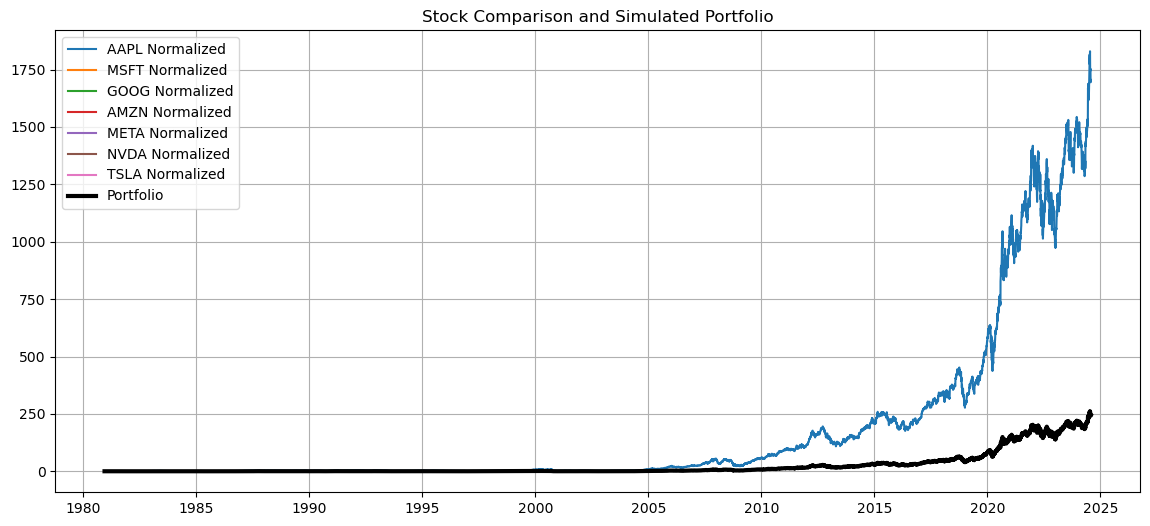

In [ ]:
plt.figure(figsize=(14, 6))
for ticker in tickers:
    plt.plot(normalized[ticker], label=f"{ticker} Normalized")
plt.plot(portfolio, label="Portfolio", linewidth=3, color='black')
plt.legend()
plt.title("Stock Comparison and Simulated Portfolio")
plt.grid(True)
plt.show()


### Save Results

In [26]:
plt.savefig("../output/comparison_plot.png")

<Figure size 640x480 with 0 Axes>